<a href="https://colab.research.google.com/github/Oreo-cake/My-Cornell-Portfolio-Lab-5-/blob/main/DMACorrelations%26EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Correlations**

---



---



In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from google.colab import auth
import gspread
import pandas as pd
from google.auth import default

# Authenticate the Google account
auth.authenticate_user()

# Authorize access
creds, _ = default()
gc = gspread.authorize(creds)

# Use the link you provided to open the Google Sheet
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1RKHbEnAeY8I0J2UuosfDQ3kNKYuZA3fmkSQ67cLeRK0/edit?gid=0#gid=0'

# Open the spreadsheet
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first worksheet
worksheet = spreadsheet.sheet1

# Get all the data and convert it to a pandas DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()

,DMA,A25+ Population,HHI $$$,ASI Annual Sales Trend (FY24 vs. FY25),AVG % Sales,AVG % Spend,Store Locations,Remodeled Stores,Foot Traffic,CPM,CPP,ASI Share of Search,ASI Share of Voice
0,"ATLANTA, GA",4959891.0,94908.54,-0.10,0.05,0.05,7.0,3.0,155100.0,42.67,2116.50,0.04,0.08
1,"BALTIMORE, MD",2068600.0,102421.48,0.01,0.05,0.05,5.0,1.0,225232.0,29.79,616.25,0.09,0.12
2,BUFFALO,1057525.0,85216.28,-0.06,0.01,0.01,2.0,0.0,24537.0,21.11,223.25,0.09,0.10
3,CHARLESTON-HUNTINGTON,724321.0,65337.83,0.04,0.00,0.00,1.0,0.0,12885.0,29.51,213.75,0.05,0.08
4,CHARLOTTE,2359039.0,88122.62,-0.05,0.03,0.04,3.0,1.0,119679.0,30.69,724.00,0.05,0.08


<ipython-input-7-d2dfb94854eb>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation


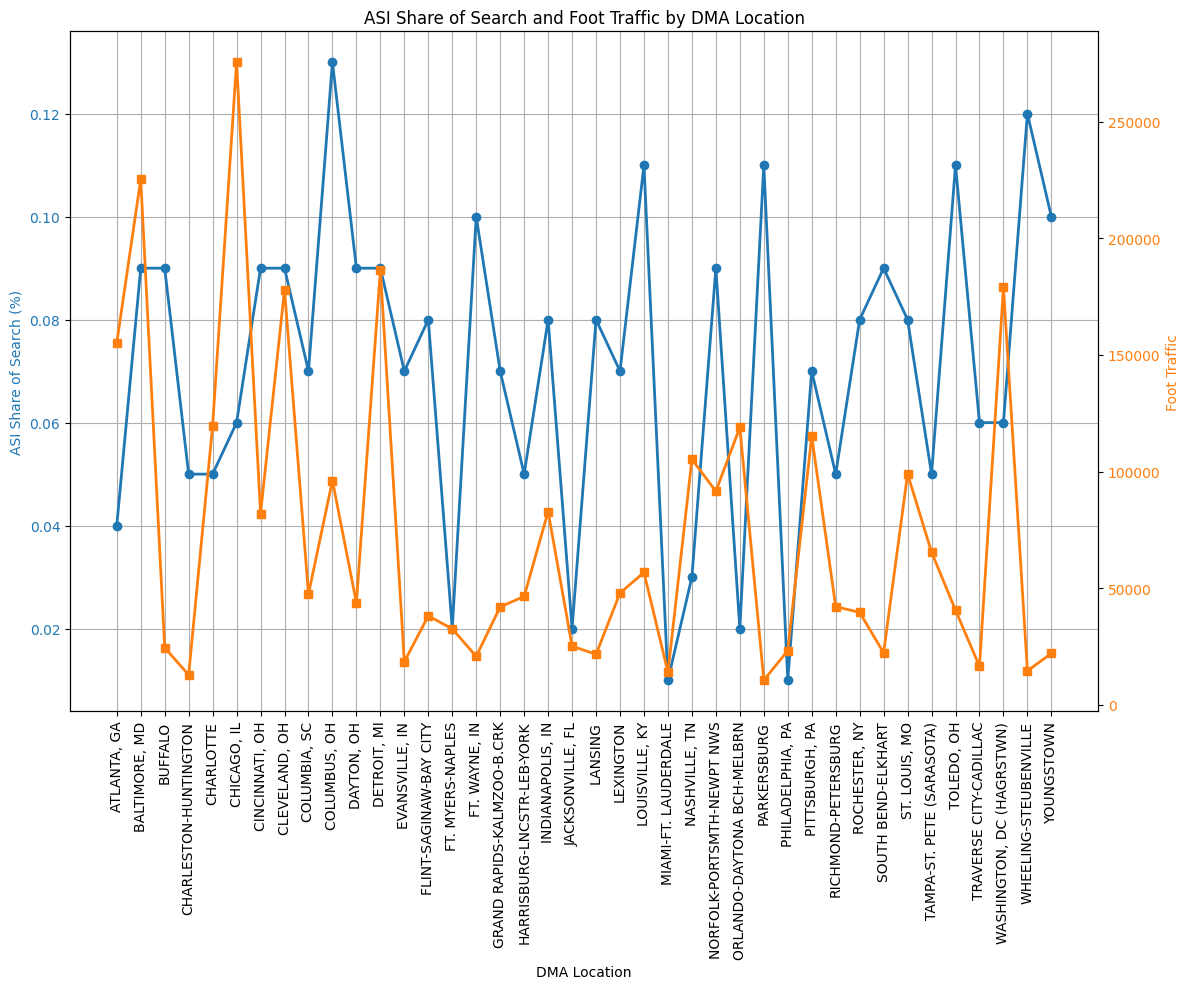

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot 'ASI Share of Search' on the left y-axis
ax1.plot(df['DMA'], df['ASI Share of Search'], color='tab:blue', label='ASI Share of Search', marker='o', linestyle='-', linewidth=2)
ax1.set_xlabel('DMA Location')
ax1.set_ylabel('ASI Share of Search (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


# Create the second y-axis for 'Foot Traffic' on the right side
ax2 = ax1.twinx()
ax2.plot(df['DMA'], df['Foot Traffic'], color='tab:orange', label='Foot Traffic', marker='s', linestyle='-', linewidth=2)
ax2.set_ylabel('Foot Traffic', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title
plt.title('ASI Share of Search and Foot Traffic by DMA Location')

# Rotate the DMA labels to be vertical (90 degrees)
ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation

# Optional: Add gridlines for better readability
ax1.grid(True)

# Show the plot
fig.tight_layout()
plt.show()

**Perform Correlation Matrix (to determine what to graph)**

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix on numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                                        A25+ Population   HHI $$$  \
A25+ Population                                1.000000  0.703217   
HHI $$$                                        0.703217  1.000000   
ASI Annual Sales Trend (FY24 vs. FY25)        -0.400508 -0.335395   
AVG % Sales                                    0.705056  0.657655   
AVG % Spend                                    0.767930  0.606919   
Store Locations                                0.699529  0.604655   
Remodeled Stores                               0.437739  0.351753   
Foot Traffic                                   0.672465  0.626466   
CPM                                           -0.007063 -0.149024   
CPP                                            0.929283  0.656991   
ASI Share of Search                           -0.476988 -0.367037   
ASI Share of Voice                            -0.219782 -0.202261   

                                        ASI Annual Sales Trend (FY24 vs. FY25)  \
A25+ Population     

In [ ]:
correlation_series = correlation_matrix.unstack()
filtered_correlations = correlation_series[correlation_series.index.get_level_values(0) != correlation_series.index.get_level_values(1)]
sorted_corr= filtered_correlations.sort_values(ascending=False)

# Output the top 10 most correlated pairs
print(sorted_corr.head(10))
# we can select the top six most correlated pairs to graph

Store Locations  AVG % Sales        0.960577
AVG % Sales      Store Locations    0.960577
CPP              A25+ Population    0.929283
A25+ Population  CPP                0.929283
AVG % Sales      AVG % Spend        0.926098
AVG % Spend      AVG % Sales        0.926098
Store Locations  Foot Traffic       0.926034
Foot Traffic     Store Locations    0.926034
                 AVG % Sales        0.925062
AVG % Sales      Foot Traffic       0.925062
dtype: float64


In [ ]:
correlations =  numeric_df.corr()['ASI Share of Search'].sort_values(ascending=False)

# Display the correlations with 'asi share of search'
print(correlations)

ASI Share of Search                       1.000000
ASI Share of Voice                        0.565012
ASI Annual Sales Trend (FY24 vs. FY25)    0.286888
CPM                                       0.077676
AVG % Sales                               0.070450
Store Locations                           0.047734
Remodeled Stores                          0.039076
Foot Traffic                             -0.007222
AVG % Spend                              -0.054470
HHI $$$                                  -0.367037
A25+ Population                          -0.476988
CPP                                      -0.492516
Name: ASI Share of Search, dtype: float64


In [ ]:
correlations =  numeric_df.corr()['ASI Share of Voice'].sort_values(ascending=False)

# Display the correlations with 'asi share of search'
print(correlations)

ASI Share of Voice                        1.000000
ASI Share of Search                       0.565012
AVG % Sales                               0.142682
Foot Traffic                              0.117812
AVG % Spend                               0.099041
Store Locations                           0.098822
Remodeled Stores                          0.080262
ASI Annual Sales Trend (FY24 vs. FY25)   -0.030619
HHI $$$                                  -0.202261
CPM                                      -0.216609
A25+ Population                          -0.219782
CPP                                      -0.300288
Name: ASI Share of Voice, dtype: float64


**Graph the highest correlated columns:**

<ipython-input-12-11cc5422064b>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation


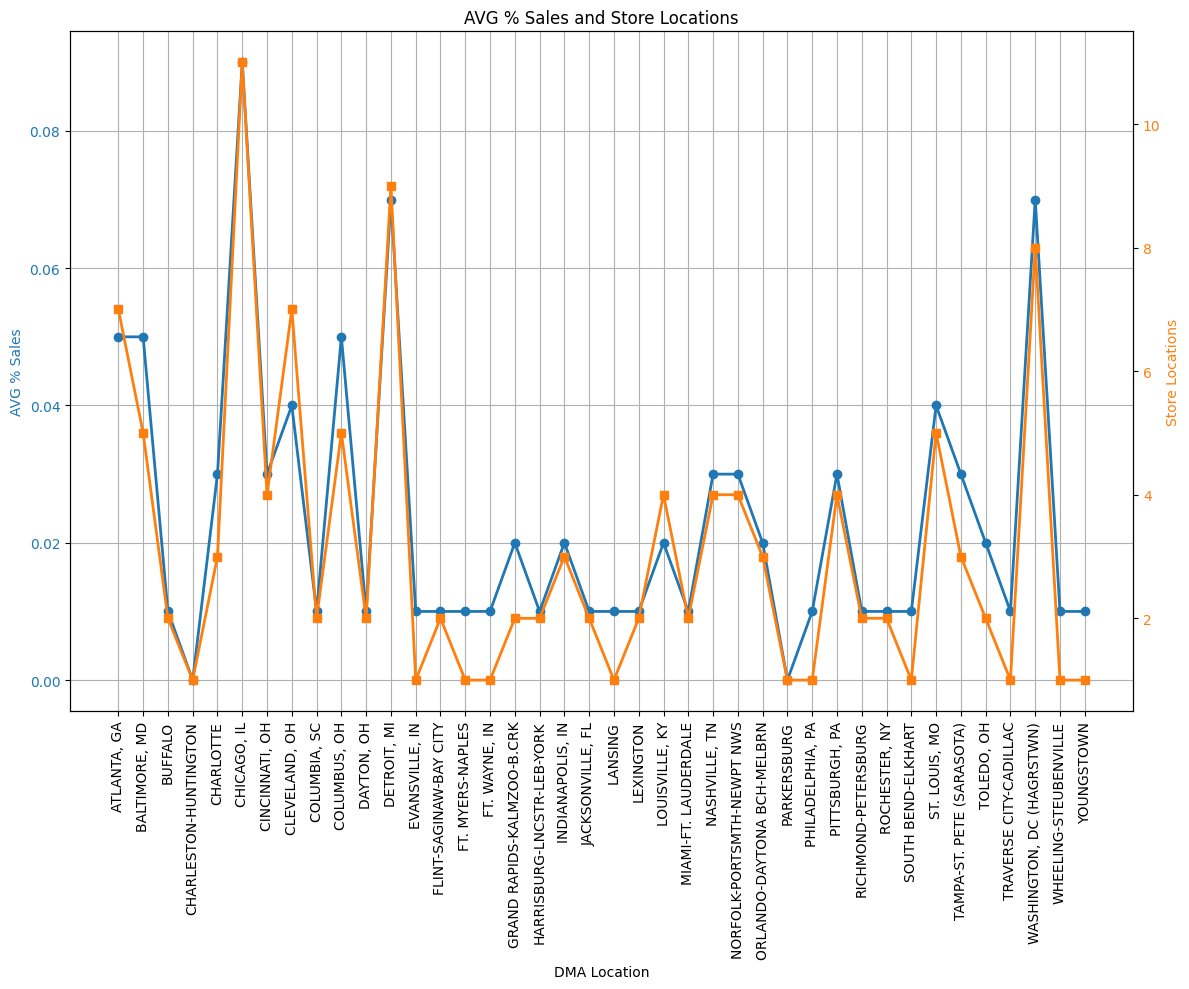

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot 'ASI Share of Search' on the left y-axis
ax1.plot(df['DMA'], df['AVG % Sales'], color='tab:blue', label='AVG % Sales', marker='o', linestyle='-', linewidth=2)
ax1.set_xlabel('DMA Location')
ax1.set_ylabel('AVG % Sales', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


# Create the second y-axis for 'Foot Traffic' on the right side
ax2 = ax1.twinx()
ax2.plot(df['DMA'], df['Store Locations'], color='tab:orange', label='Store Locations', marker='s', linestyle='-', linewidth=2)
ax2.set_ylabel('Store Locations', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title
plt.title('AVG % Sales and Store Locations')

# Rotate the DMA labels to be vertical (90 degrees)
ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation

# Optional: Add gridlines for better readability
ax1.grid(True)

# Show the plot
fig.tight_layout()
plt.show()

<ipython-input-24-bc2f40ed43bf>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation


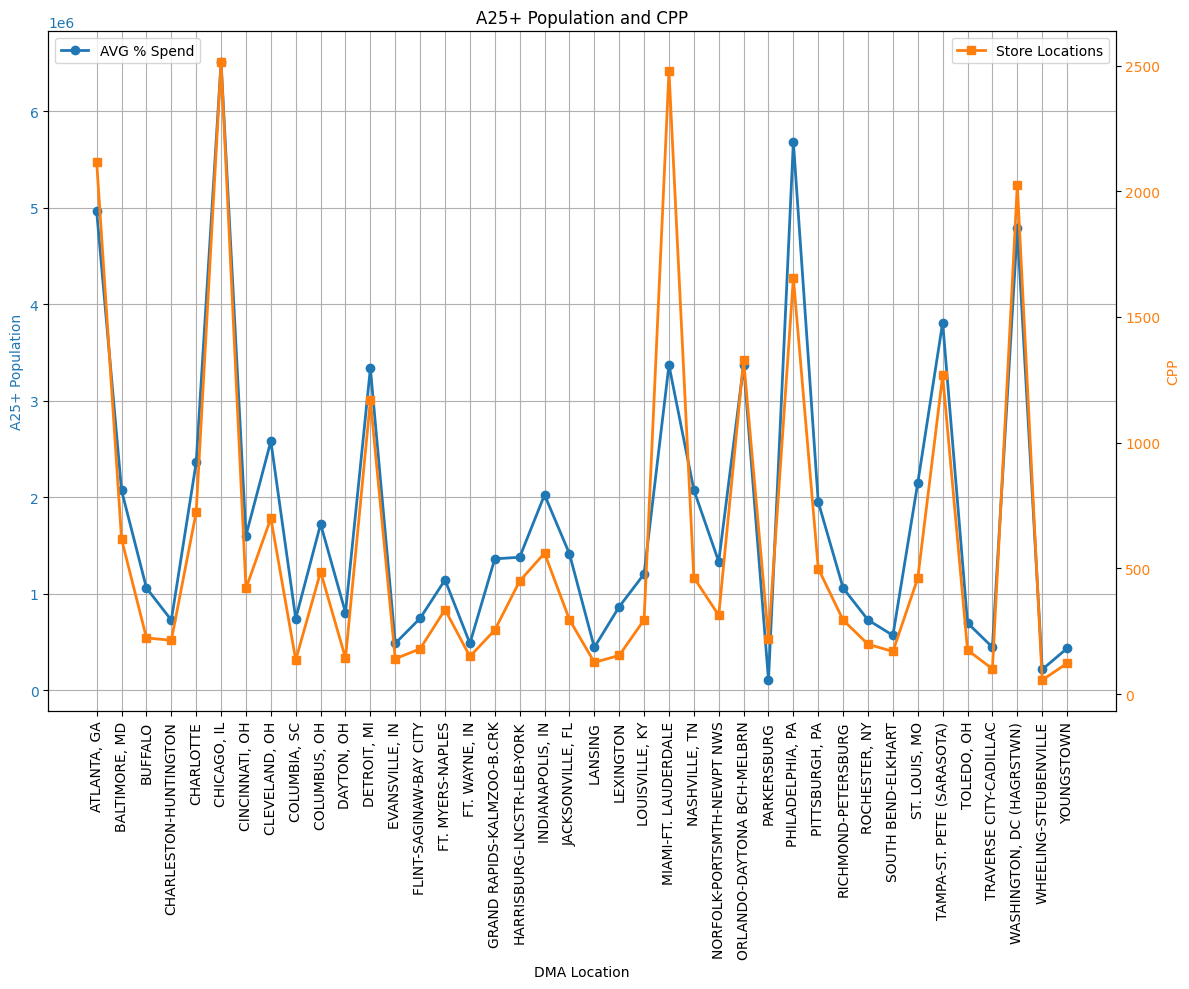

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot 'ASI Share of Search' on the left y-axis
ax1.plot(df['DMA'], df['A25+ Population'], color='tab:blue', label='AVG % Sales', marker='o', linestyle='-', linewidth=2)
ax1.set_xlabel('DMA Location')
ax1.set_ylabel('A25+ Population', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


# Create the second y-axis for 'Foot Traffic' on the right side
ax2 = ax1.twinx()
ax2.plot(df['DMA'], df['CPP'], color='tab:orange', label='CPP', marker='s', linestyle='-', linewidth=2)
ax2.set_ylabel('CPP', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title
plt.title('A25+ Population and CPP')

# Rotate the DMA labels to be vertical (90 degrees)
ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation

# Optional: Add gridlines for better readability
ax1.grid(True)

# Show the plot
fig.tight_layout()
plt.show()

<ipython-input-23-a56ddf7cfebf>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation


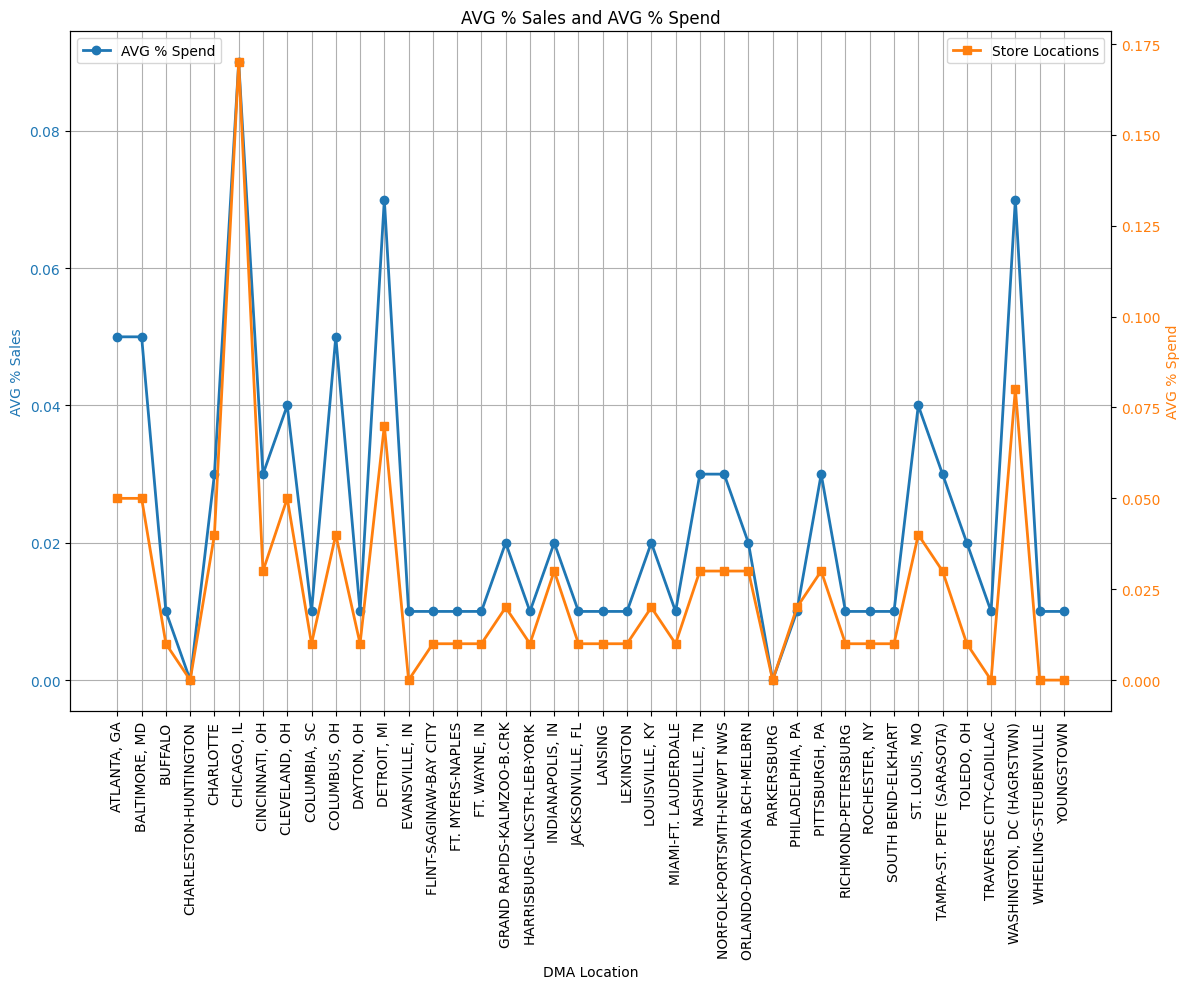

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot 'ASI Share of Search' on the left y-axis
ax1.plot(df['DMA'], df['AVG % Sales'], color='tab:blue', label='AVG % Sales', marker='o', linestyle='-', linewidth=2)
ax1.set_xlabel('DMA Location')
ax1.set_ylabel('AVG % Sales', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


# Create the second y-axis for 'Foot Traffic' on the right side
ax2 = ax1.twinx()
ax2.plot(df['DMA'], df['AVG % Spend'], color='tab:orange', label='AVG % Spend', marker='s', linestyle='-', linewidth=2)
ax2.set_ylabel('AVG % Spend', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title
plt.title('AVG % Sales and AVG % Spend')

# Rotate the DMA labels to be vertical (90 degrees)
ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation

# Optional: Add gridlines for better readability
ax1.grid(True)


# Show the plot
fig.tight_layout()
plt.show()


<ipython-input-22-21b18876def0>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation


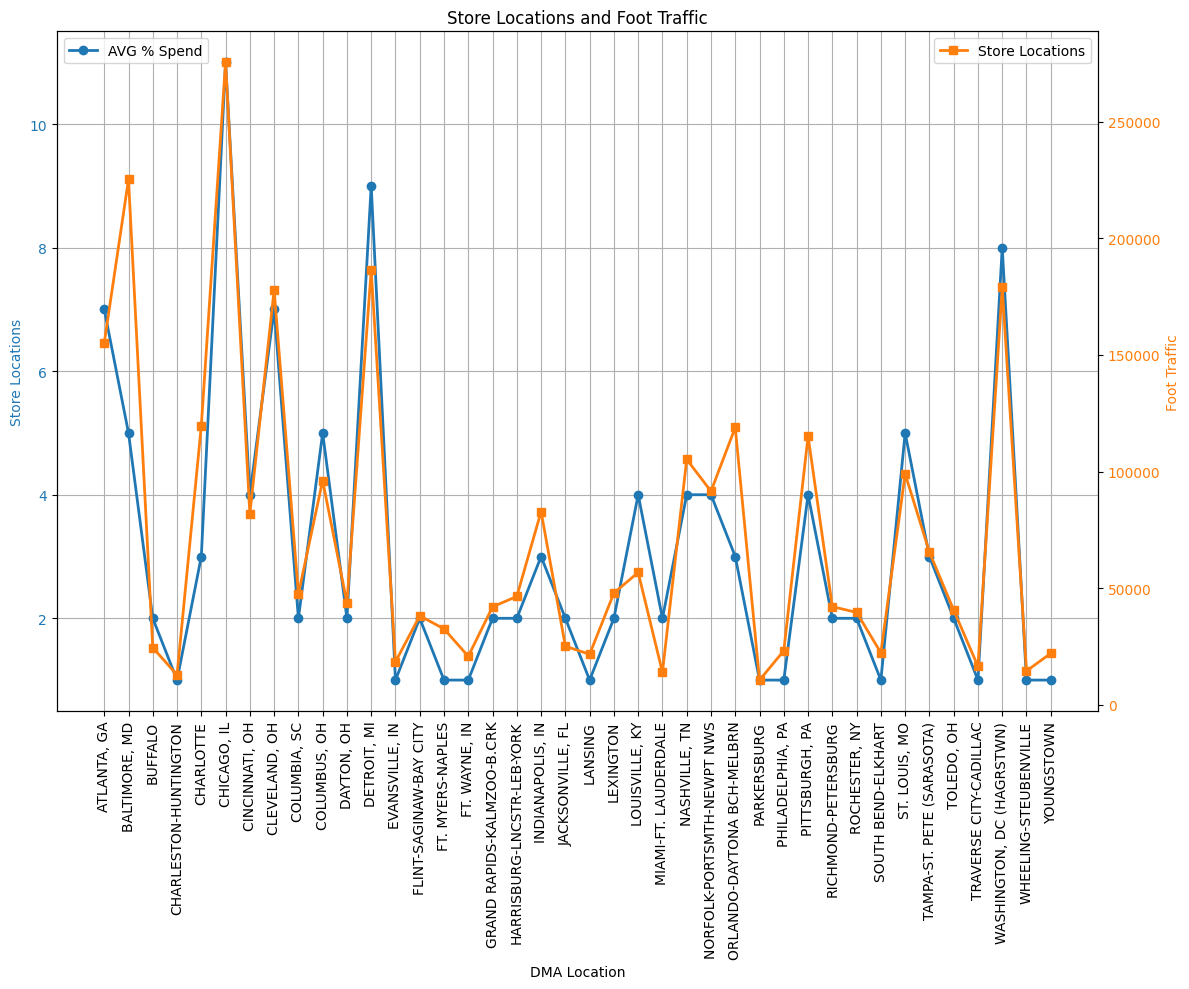

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot 'ASI Share of Search' on the left y-axis
ax1.plot(df['DMA'], df['Store Locations'], color='tab:blue', label='Store Locations', marker='o', linestyle='-', linewidth=2)
ax1.set_xlabel('DMA Location')
ax1.set_ylabel('Store Locations', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


# Create the second y-axis for 'Foot Traffic' on the right side
ax2 = ax1.twinx()
ax2.plot(df['DMA'], df['Foot Traffic'], color='tab:orange', label='Foot Traffic', marker='s', linestyle='-', linewidth=2)
ax2.set_ylabel('Foot Traffic', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title
plt.title('Store Locations and Foot Traffic')

# Rotate the DMA labels to be vertical (90 degrees)
ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation

# Optional: Add gridlines for better readability
ax1.grid(True)


# Show the plot
fig.tight_layout()
plt.show()

<ipython-input-21-e515861e68bb>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation


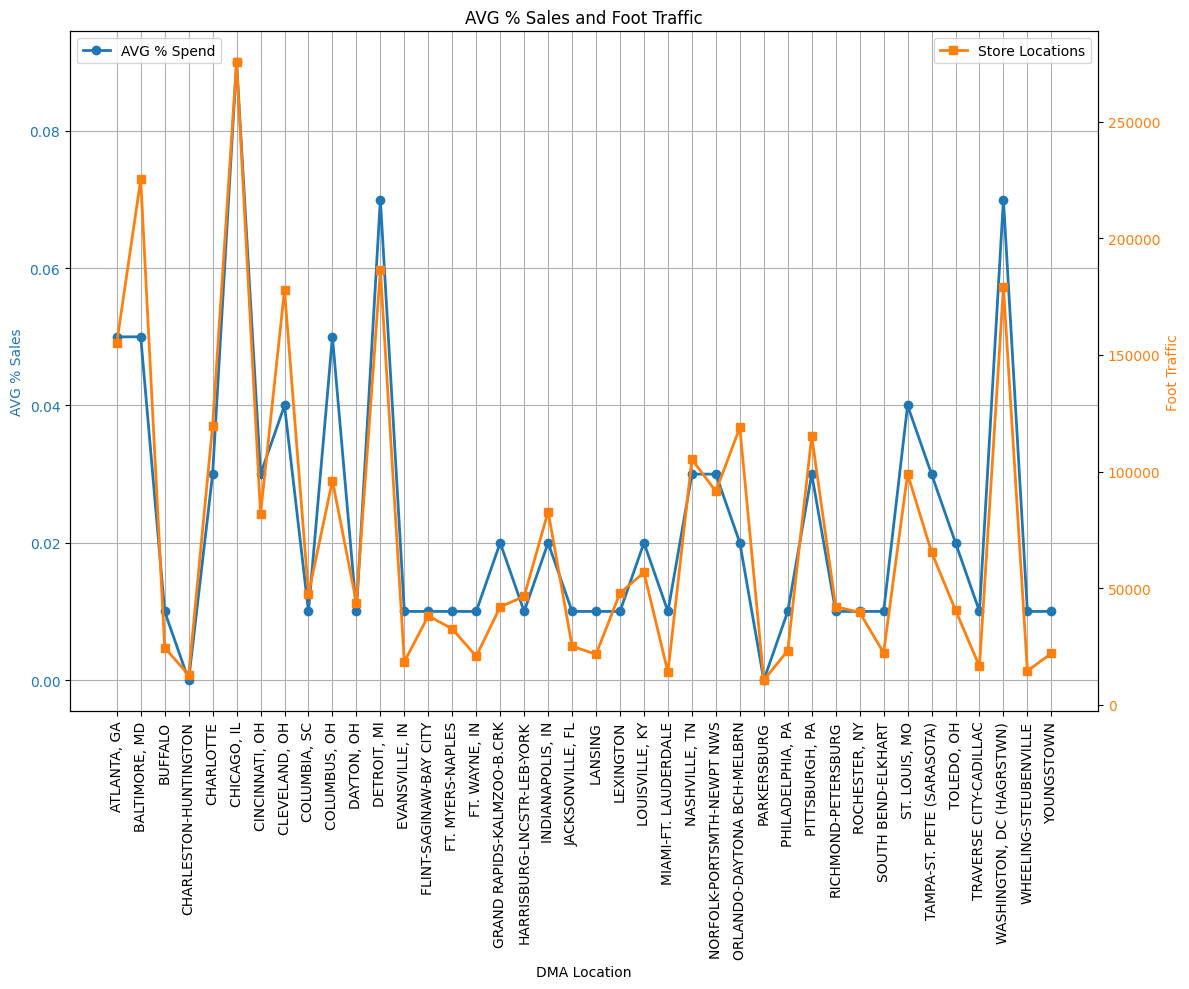

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot 'ASI Share of Search' on the left y-axis
ax1.plot(df['DMA'], df['AVG % Sales'], color='tab:blue', label='AVG % Sales', marker='o', linestyle='-', linewidth=2)
ax1.set_xlabel('DMA Location')
ax1.set_ylabel('AVG % Sales', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


# Create the second y-axis for 'Foot Traffic' on the right side
ax2 = ax1.twinx()
ax2.plot(df['DMA'], df['Foot Traffic'], color='tab:orange', label='Foot Traffic', marker='s', linestyle='-', linewidth=2)
ax2.set_ylabel('Foot Traffic', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title
plt.title('AVG % Sales and Foot Traffic')

# Rotate the DMA labels to be vertical (90 degrees)
ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation

# Optional: Add gridlines for better readability
ax1.grid(True)


# Show the plot
fig.tight_layout()
plt.show()

<ipython-input-17-c13be7ae39c1>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation


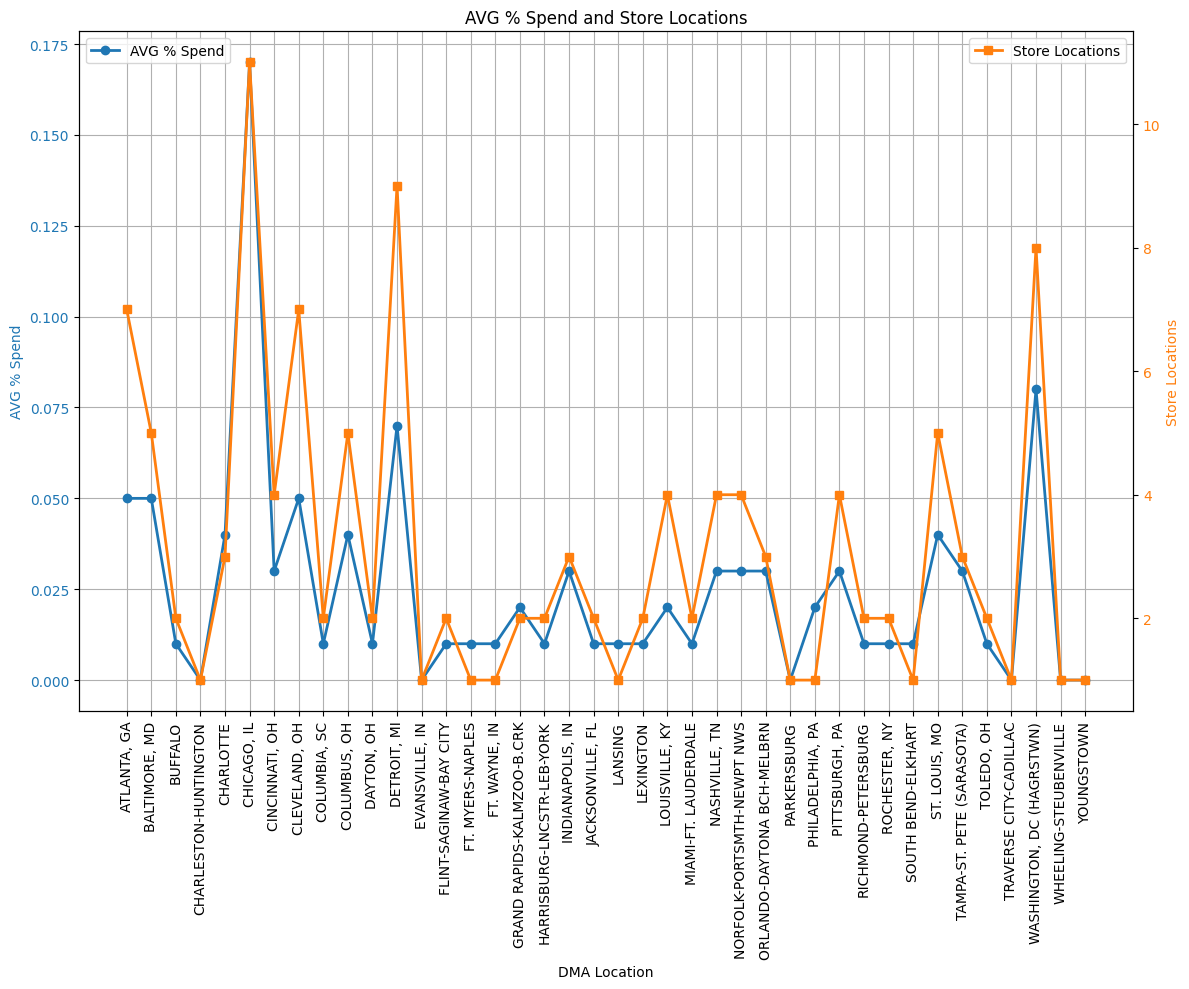

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot 'ASI Share of Search' on the left y-axis
line1, = ax1.plot(df['DMA'], df['AVG % Spend'], color='tab:blue', label='AVG % Spend', marker='o', linestyle='-', linewidth=2)
ax1.set_xlabel('DMA Location')
ax1.set_ylabel('AVG % Spend', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis for 'Foot Traffic' on the right side
ax2 = ax1.twinx()
line2, = ax2.plot(df['DMA'], df['Store Locations'], color='tab:orange', label='Store Locations', marker='s', linestyle='-', linewidth=2)
ax2.set_ylabel('Store Locations', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title
plt.title('AVG % Spend and Store Locations')

# Rotate the DMA labels to be vertical (90 degrees)
ax1.set_xticklabels(df['DMA'], rotation=90, ha="center")  # 90 degrees vertical rotation

# Optional: Add gridlines for better readability
ax1.grid(True)

# Add a legend for both y-axes
ax1.legend(handles=[line1], loc='upper left')
ax2.legend(handles=[line2], loc='upper right')

# Show the plot
fig.tight_layout()
plt.show()

In [ ]:
spearman_corr = numeric_df.corr(method = 'spearman')
correlation_series = spearman_corr.unstack()
filtered_correlations = correlation_series[correlation_series.index.get_level_values(0) != correlation_series.index.get_level_values(1)]
sorted_corr= filtered_correlations.sort_values(ascending=False)

# Output the top 10 most correlated pairs
print(sorted_corr.head(10))

A25+ Population  CPP                0.951595
CPP              A25+ Population    0.951595
AVG % Spend      AVG % Sales        0.933795
AVG % Sales      AVG % Spend        0.933795
Foot Traffic     Store Locations    0.926345
Store Locations  Foot Traffic       0.926345
Foot Traffic     AVG % Spend        0.921325
AVG % Spend      Foot Traffic       0.921325
Store Locations  AVG % Sales        0.914400
AVG % Sales      Store Locations    0.914400
dtype: float64


**ASI Search Volume Overtime for each DMA**

---



---



In [ ]:
# Use the link you provided to open the Google Sheet
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1iJRH6W5soylrmNc4VCKRAqy-cIKbdm9N4v6JRePUnCY/edit?gid=613380384#gid=613380384'

# Open the spreadsheet
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first worksheet
worksheet = spreadsheet.sheet1

# Get all the data and convert it to a pandas DataFrame
sv_data = worksheet.get_all_records()
sv_df = pd.DataFrame(sv_data)

# Display the first few rows of the DataFrame
sv_df.head()

,DMA,CHICAGO,DETROIT,"WASHINGTON,DC","COLUMBUS,OH",BALTIMORE,ATLANTA,CLEVELAND,ST LOUIS,TAMPA,...,PHILADELPHIA,LANSING,FT WAYNE,YOUNGSTOWN,TRAVERSE CITY,WHEELING,SOUTH BEND,EVANSVILLE,"CHARLESTON,WV",PARKERSBURG
0,Aug-23,41380,33640,34100,22660,22800,24660,27480,15050,6580,...,6410,2440,2960,2940,1330,1930,3670,2460,2950,910
1,Sep-23,41280,33460,27770,18440,18700,23850,22500,14980,6440,...,6410,2460,2960,2950,1330,1620,2980,1640,2430,900
2,Oct-23,41280,33480,27790,18490,18570,23820,22520,15000,5400,...,6370,2430,2930,2950,1320,1630,3690,1660,2450,910
3,Nov-23,50440,40920,41350,27510,27710,29410,27530,18340,8090,...,6910,3650,4440,3650,1630,2430,4470,2450,2970,1020
4,Dec-23,41050,33430,27790,18410,18640,19860,22500,15030,6440,...,5560,2930,2950,2960,1320,1920,3670,1970,2930,910


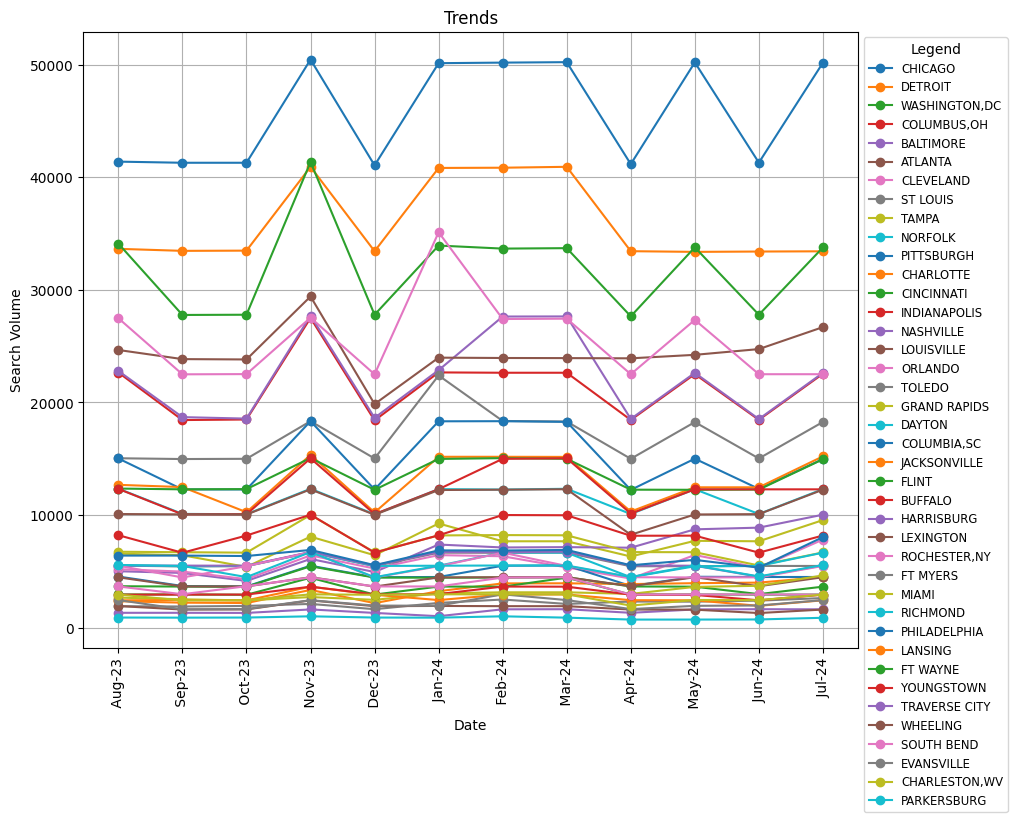

In [ ]:
sv_df.set_index('DMA', inplace=True)
sv_df_volume=sv_df
plt.figure(figsize=(10,8))
for x in sv_df_volume.columns:
  plt.plot(sv_df_volume.index, sv_df_volume[x], label=x, marker='o')

plt.xlabel('Date')
plt.legend(fontsize='small')
plt.ylabel('Search Volume')
plt.title('Trends')
plt.legend(fontsize='small', loc='upper left', bbox_to_anchor=(1, 1), title="Legend")

plt.grid(True)
plt.xticks(rotation='vertical')
plt.show()